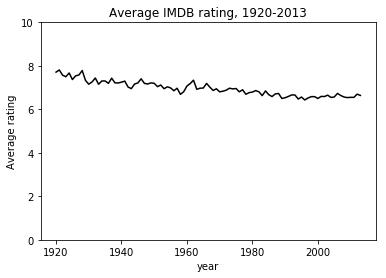

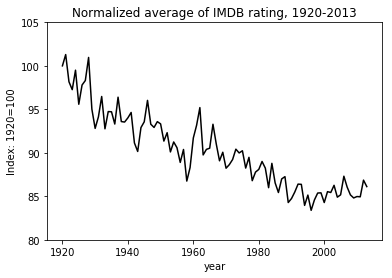

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import seaborn as sns
from data_gen import gen_df

def fig2_J():
    # Importing data and making new dataframe
    filename = 'imdb.csv'
    df = gen_df(filename)
    imdb = df.copy()

    # Creating variable that takes the average IMDB rating per year
    imdb['avg_rat'] = imdb.groupby('year')['imdbRating'].transform(lambda x : x.mean())
    
    # Normalizing the average rating, index 100=1920
    imdb['avg_rat_index'] = imdb['avg_rat'].transform(lambda x : x/x[0]*100)
    
    # Creating new dataframe which only contain one value (the normalized ratings) per year 
    x=pd.DataFrame(imdb.groupby('year')['avg_rat_index'].first())
    x.reset_index(inplace=True)

    # Plotting the average ratings 
    ax = imdb.groupby('year')['imdbRating'].agg(lambda x : x.mean()).plot(x='year', y = 'imdbRating', color='black')
    ax.set_ylabel('Average rating')
    ax.set_title(f'Average IMDB rating, 1920-2013')
    ax.set_ylim([0,10])

    # Plotting the normalized average ratings
    ax2 = x.plot(x='year', y = 'avg_rat_index', color='black', legend=False)
    ax2.set_ylabel(f'Index: 1920=100')
    ax2.set_title(f'Normalized average of IMDB rating, 1920-2013')
    ax2.set_ylim([80,105])
    
fig2_J()
